<a href="https://colab.research.google.com/github/nutapol97/Python-for-DS-AI_Nutapol_T./blob/main/Assignment_Supervised_Learning_Naive_Bayesian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

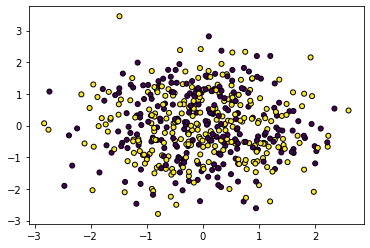

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import average_precision_score, classification_report
X, y = make_classification(n_samples=500, n_features=10, n_redundant=2, n_informative=4,
                             n_clusters_per_class=2, random_state=10)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [2]:
class Gaussian_Naive_Classification():
  def __init__(self, test_size=0.3):
    self.test_size=test_size
    
  def mean_std(self,X, y):
    n = X.shape[1]
    mean = np.zeros((2, n))
    std = np.zeros((2, n))
    for label in [0, 1]:
        mean[label, :] = X[y==label].mean(axis=0)
        std[label, :]  = X[y==label].std(axis=0)
    return mean, std
  
  def gaussian_pdf(self,X, mean, std):
      left = 1 / (np.sqrt(2 * np.pi) * std)
      e = (X - mean) ** 2 / (2 * (std ** 2))
      right = np.exp(-e)
      return left*right
  def display_report(self,y_test,posterior1,posterior0):
    yhat = 1 * posterior1 > posterior0
    print("=========Average precision score=======")
    print(average_precision_score(y_test, yhat))
    print("=========Classification report=======")
    print("Report: ", classification_report(y_test, yhat))

  def fit(self,X, y):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=self.test_size)
    
    mean, std = self.mean_std(X_train,y_train)
    assert mean.shape == (2, X_train.shape[1])
    assert std.shape == (2, X_train.shape[1])
    
    likelihood0 = self.gaussian_pdf(X_test, mean[0, :], std[0, :])
    likelihood1 = self.gaussian_pdf(X_test, mean[1, :], std[0, :])
    assert likelihood0.shape == (X_test.shape[0], X_test.shape[1]), "Shape is wrong for pdf0!"
    assert likelihood1.shape == (X_test.shape[0], X_test.shape[1]), "Shape is wrong for pdf1!"
    
    total_likelihood0 = np.prod(likelihood0, axis=1)
    total_likelihood1 = np.prod(likelihood1, axis=1)

    m0 = len(X_train[y_train==0])
    m1 = len(X_train[y_train==1])
    prior0 = m0 / (m0 + m1)
    prior1 = m1 / (m0 + m1)
    assert prior0 + prior1 == 1, "probability not equal 1"

    posterior0 = prior0 * total_likelihood0 
    posterior1 = prior1 * total_likelihood1
    self.display_report(y_test,posterior1,posterior0)
  
    





In [7]:
model=Gaussian_Naive_Classification()

In [8]:
model.fit(X, y)

=========Average precision score=======
0.6898858592263792
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.78      0.70      0.74        74
           1       0.73      0.80      0.77        76

    accuracy                           0.75       150
   macro avg       0.76      0.75      0.75       150
weighted avg       0.76      0.75      0.75       150



In [9]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Average precision score=======
0.7782006920415224
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.77      0.77      0.77        65
           1       0.82      0.82      0.82        85

    accuracy                           0.80       150
   macro avg       0.80      0.80      0.80       150
weighted avg       0.80      0.80      0.80       150

